In [1]:
import numpy as np                        # v 1.19.2
import pandas as pd                       # v 1.1.3
import pandas_market_calendars as mcal    # v 1.6.1
from scipy.signal import find_peaks       # v 1.5.2


In [2]:

# Create datetime index with a 'trading day end' frequency based on the New York Stock
# Exchange trading hours (end date is inclusive)
nyse = mcal.get_calendar('NYSE')
nyse_schedule = nyse.schedule(start_date='2019-10-01', end_date='2021-02-01')
nyse_dti = mcal.date_range(nyse_schedule, frequency='1D').tz_convert(nyse.tz.zone)

# Create sample of random data for daily stock closing price
rng = np.random.default_rng(seed=1234)  # random number generator
price = 100 + rng.normal(size=nyse_dti.size).cumsum()
df = pd.DataFrame(data=dict(price=price), index=nyse_dti)

In [10]:
peaks

array([ 31, 162, 211, 283], dtype=int64)

In [11]:
troughs

array([ 47, 178, 264, 324], dtype=int64)

<AxesSubplot:>

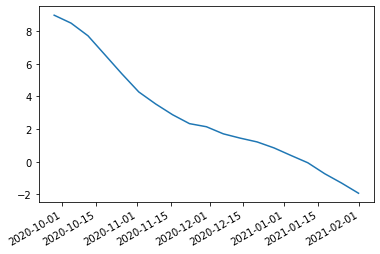

In [37]:
#(df['price'].asfreq('D').interpolate().asfreq('W').rolling(12).mean()-df['price'].asfreq('D').interpolate().asfreq('W').rolling(52).mean()).plot()

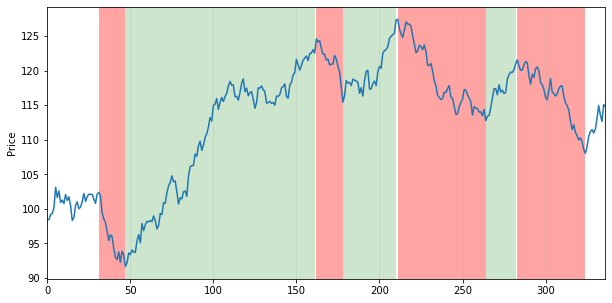

In [30]:
# Plot stock price
ax = df['price'].plot(figsize=(10, 5), use_index=False, ylabel='Price')
ax.set_xlim(0, df.index.size-1)
ax.grid(axis='x', alpha=0.3)

# Highlight drawdowns using the indices of stock peaks and troughs: find peaks and 
# troughs based on signal analysis rather than an algorithm for drawdowns to keep
# example simple. Width and prominence have been handpicked for this example to work.
peaks, _ = find_peaks(df['price'], width=7, prominence=4)
troughs, _ = find_peaks(-df['price'], width=7, prominence=4)
for peak, trough in zip(peaks, troughs):
    ax.axvspan(peak, trough, facecolor='red', alpha=.2)

"""

    
# Create and format monthly ticks
ticks = [idx for idx, timestamp in enumerate(df.index)
         if (timestamp.month != df.index[idx-1].month) | (idx == 0)]
ax.set_xticks(ticks)
labels = [tick.strftime('%b\n%Y') if df.index[ticks[idx]].year
          != df.index[ticks[idx-1]].year else tick.strftime('%b')
          for idx, tick in enumerate(df.index[ticks])]
ax.set_xticklabels(labels)
ax.figure.autofmt_xdate(rotation=0, ha='center')

ax.set_title('Drawdowns are highlighted in red', pad=15, size=14);
"""
    
ax.set_ylim(*ax.get_ylim())  # remove top and bottom gaps with plot frame

drawdowns = np.repeat(False, df['price'].size)
expansions = np.repeat(False, df['price'].size)

for peak, trough in zip(peaks, troughs):
    drawdowns[np.arange(peak, trough+1)] = True
    
for trough, peak in zip(troughs, peaks):
    try:
        expansions[np.arange(trough, peaks[np.where(troughs==trough)[0][0]+1])] = True
    except:
        pass
    
ax.fill_between(np.arange(df.index.size), *ax.get_ylim(), where=drawdowns,
                facecolor='red', alpha=.2)
ax.fill_between(np.arange(df.index.size), *ax.get_ylim(), where=expansions,
                facecolor='green', alpha=.2)

1

In [18]:
for trough, peak in zip(troughs, peaks):
    print(trough)
    print(peak)

47
31
178
162
264
211
324
283
